<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week11_HW1_Document_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 개념 필사
(파이썬 머신러닝 완벽 가이드 ch8. 7, 10 pg. 516-528, 544-561)


## 문서 군집화
### 1. 문서 군집화 개념
- **문서 군집화(Document Clustering)**는 **비슷한 텍스트 구성의 문서를 군집화**하는 것이다.
- 문서 군집화는 **동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류**할 수 있으므로 앞에서 소개한 **텍스트 분류 기반의 문서 분류와 유사**하다.
- 하지만 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 반면, **문서 군집화는 학습 데이터 세트가 필요 없는 비지도학습** 기반으로 동작한다.
- 군집화 기법을 활용하여 텍스트 기반의 문서 군집화를 적용한다.

### 2. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기
- 문서 군집화를 수행할 데이터 세트는 Opinion Review 데이터 세트이다. 해당 데이터 세트는 51개의 텍스트 파일로 구성되어 있으며, 각 파일은 Tripadvisor(호텔), Edmunds.com(자동차), Amazon.com(전자제품) 사이트에서 가져온 리뷰 문서이다. 각 문서는 약 100개 정도의 문장을 가지고 있다.
- 파일명과 파일 리뷰를 하나의 DataFrame으로 로드하여 데이터 처리를 진행한다.
- 아래 코드와 같이 반복문을 통해 개별 파일명을 파일명 리스트에 추가하고, 개별 파일은 DataFrame으로 읽은 후 다시 문자열로 반환하여 파일 내용 리스트에 추가한다. 이렇게 만들어진 파일명 리스트와 파일 내용 리스트를 이용하여 새롭게 파일명과 파일 내용을 칼럼으로 가지는 DataFrame을 생성한다.
- `head()`를 이용하여 살펴보면 각 파일 이름(filename) 자체만으로도 의견(opinion)의 텍스트(text)가 어떠한 제품/서비스에 대한 리뷰인지 잘 알 수 있다.



In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob, os

path = r'/content/drive/MyDrive/ESAA/data/OpinosisDataset1.0/OpinosisDataset1.0/topics'
#path로 저장한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text=[]

#개별 파일의 파일명은 filename_list로 취합,
#개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
  #개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  #절대 경로로 주어진 파일명을 가공
  #맨 마지막 .data 확장자도 제거 
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  #파일명 List와 파일 내용 List에 파일명과 파일 내용을 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

#파일명 List와 파일 내용 list 객체를 Dataframe으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_netbook_1005ha,...
1,food_holiday_inn_london,...
2,mileage_honda_accord_2008,...
3,features_windows7,...
4,buttons_amazon_kindle,...


### 2. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기
- 문서를 **TF-IDF** 형태로 피처 벡터화한다. 
- `tokenizer`는 이전 예제에서 Lemmatization을 구현한 LemNormalize() 함수를 이용하며, `ngram_range=(1,2)`, `min_df=0.05`와 `max_df=0.85`로 범위를 설정하여 피처의 개수를 제한한다.
- **`TfidfVectorizer`**의 `fit_transform()`의 인자로 document_df의 opinion_text 칼럼을 입력하면 개별 문서 텍스트에 대해 **TF-IDF 변환된 피처 벡터화 행렬**을 구할 수 있다.

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)

#opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

### 2. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기
- 문서별 텍스트가 **TF-IDF 변환된 피처 벡터화 행렬 데이터에 대해서 군집화를 수행**하여 어떤 문서끼리 군집되는지 확인한다. 군집화 기법은 **K-평균**을 적용한다.
- 문서의 유형은 크게 보자면 전자제품, 자동차, 호텔로 나뉜다. 먼저 5개의 중심 기반으로 어떻게 군집화되는지 확인한다. 최대 반복 횟수는 `max_iter=10000`으로 설정한다.
- KMeans를 수행한 후에 **군집의 Label 값**과 **각 군집의 중심별로 할당된 데이터 세트의 좌표 값**을 구한다.
- 각 데이터별로 할당된 군집의 레이블을 파일명과 파일 내용을 가지고 있는 document_df에 'cluster_label' 칼럼을 추가하여 저장한다. 
- 각 파일명은 의견 리뷰에 대한 주제를 나타낸다. 군집이 각 주제별로 유사한 형태로 잘 구성되는지 알아본다.
- DataFrame의 **`sort_values(by=정렬칼럼명)`**를 수행하면 인자로 입력된 '정렬칼럼명'으로 데이터를 정렬할 수 있다. document_df 객체에서 cluster_label로 어떤 파일명으로 매칭되었는지 보면서 군집화 결과를 확인한다.
 - cluster_label=0 : cluster #0 은 자동차에 대한 리뷰로 군집화되었음
 - cluster_label=1 : cluster #1 은 호텔에 대한 리뷰로 군집화되었음
 

In [ ]:
from sklearn.cluster import KMeans
#5개 집합으로 군집화 수행
km_cluster=KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

In [ ]:
document_df['cluster_label']=cluster_label
document_df.head(3)

,filename,opinion_text,clsuter_label,cluster_label
0,battery-life_netbook_1005ha,...,2,4
1,food_holiday_inn_london,...,1,1
2,mileage_honda_accord_2008,...,0,0


In [ ]:
document_df[document_df['clsuter_label']==0].sort_values(by='filename')

,filename,opinion_text,clsuter_label,cluster_label
6,comfort_honda_accord_2008,...,0,3
25,comfort_toyota_camry_2007,...,0,3
21,gas_mileage_toyota_camry_2007,...,0,0
9,interior_honda_accord_2008,...,0,3
12,interior_toyota_camry_2007,...,0,3
2,mileage_honda_accord_2008,...,0,0
17,performance_honda_accord_2008,...,0,0
45,quality_toyota_camry_2007,...,0,0
26,seats_honda_accord_2008,...,0,3
35,transmission_toyota_camry_2007,...,0,0


In [ ]:
document_df[document_df['clsuter_label']==1].sort_values(by='filename')

,filename,opinion_text,clsuter_label,cluster_label
11,bathroom_bestwestern_hotel_sfo,...,1,1
1,food_holiday_inn_london,...,1,1
5,food_swissotel_chicago,...,1,1
22,free_bestwestern_hotel_sfo,...,1,1
13,location_bestwestern_hotel_sfo,...,1,1
8,location_holiday_inn_london,...,1,1
19,parking_bestwestern_hotel_sfo,...,1,1
27,price_holiday_inn_london,...,1,1
44,room_holiday_inn_london,...,1,1
40,rooms_bestwestern_hotel_sfo,...,1,1


### 2. Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기
- 전반적으로 군집화된 결과를 살펴보면 군집 개수가 약간 많게 설정되어 있어서 세분화되어 군집화된 경향이 있다.
- 중심의 개수를 5개에서 3개로 낮추어 3개 그룹으로 군집화한 뒤에 결과를 확인한다.
 - cluster_label=0 : cluster #0 은 자동차에 대한 리뷰로 군집화되었음
 - cluster_label=1 : cluster #1 은 호텔에 대한 리뷰로 군집화되었음
 - cluster_label=2 : clsuter #2 는 포터블 전자기기에 대한 리뷰로 군집화되었음

In [ ]:
#3개 집합으로 군집화 수행
km_cluster=KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,clsuter_label,cluster_label
25,comfort_toyota_camry_2007,...,0,0
12,interior_toyota_camry_2007,...,0,0
21,gas_mileage_toyota_camry_2007,...,0,0
45,quality_toyota_camry_2007,...,0,0
9,interior_honda_accord_2008,...,0,0
6,comfort_honda_accord_2008,...,0,0
17,performance_honda_accord_2008,...,0,0
35,transmission_toyota_camry_2007,...,0,0
2,mileage_honda_accord_2008,...,0,0
26,seats_honda_accord_2008,...,0,0


### 3. 군집별 핵심 단어 추출하기
- 각 군집에 속한 **문서는 핵심 단어를 주축으로 군집화**된다. 각 군집을 구성하는 핵심 단어에는 어떤 것이 있는지 확인한다.
- **`KMeans`** 객체는 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지 **`cluster_centers_`**라는 속성으로 제공한다. 
- **`cluster_centers_`**는 배열 값으로 제공되며, **행은 개별 군집**을, **열은 개별 피처**를 의미한다. 각 배열 내의 값은 **개별 군집 내의 상대 위치를 숫자 값으로 표현**한 일종의 좌표 값이다.
 - 예를 들어 cluster_centers[0, 1]은 0번 군집에서 2번째 피처의 위치 값이다.
- 앞에서 군집 3개로 생성한 KMeans 객체인 km_cluster에서 `cluster_centers_ `속성값을 가져와 값을 확인한다.
- `cluster_centers_`는 (3, 4611)의 배열이므로, 군집 3개, word 피처 2409개로 구성되었음을 의미한다. 
- **각 행렬의 배열 값**은 각 군집 내의 4611개의 **피처 위치가 개별 중심과 얼마나 가까운지를 상대 값으로 나타낸 것**이다. **0에서 1**까지의 값을 가질 수 있으며, **1에 가까울수록 중심과 가까운 값**을 의미한다.

In [ ]:
cluster_centers=km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape:  (3, 4611)
[[0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.01005322 0.         0.         ... 0.00706287 0.         0.        ]]


### 3. 군집별 핵심 단어 추출하기
- 이제 `cluster_centers_` 속성값을 이용하여 각 군집별 핵심 단어를 찾는다. 
- `cluster_centers_` 속성은 넘파이의 **ndarray**이므로, **`argsort( )[:, ::-1]`**를 이용하면 cluster_centers **배열 내 값이 큰 순으로 정렬된 위치 인덱스 값을 반환**한다. 위치 인덱스 값이 필요한 이유는 핵심 단어 피처의 이름을 출력하기 위해서이다.
- 새로운 함수 get_cluster_details()를 생성하여 위에 대한 처리를 진행한다.
 - cluster_centers 배열 내에서 가장 값이 큰 데이터의 위치 인덱스를 추출한다.
 - 해당 인덱스를 이용하여 핵심 단어 이름과 그때의 상대 위치 값을 추출하여 cluster_details라는 **`Dict`** 객체 변수에 기록하고 반환한다.
- get_cluster_details()를 호출하면 딕셔너리를 원소로 가지는 리스트인 cluster_details를 반환하는데, **개별 군집번호, 핵심 단어, 핵심 단어 중심 위치 상대값, 파일명 속성 값** 정보를 가지고 있다.
- 이를 좀 더 보기 좋게 표현하기 위해 별도의 print_cluster_details() 함수를 생성한다.


In [ ]:
#군집별 top n 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명을 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details={}
    #cluster_centers array의 값이 큰 순서로 정렬된 인덱스 값을 반환
    centroid_feature_ordered_ind=cluster_model.cluster_centers_.argsort()[:, ::-1]
    
    #개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        #개별 군집별 정보를 담을 데이터 초기화
        cluster_details[cluster_num]={}
        cluster_details[cluster_num]['cluster']=cluster_num

        #cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용하여 top n 피처 단어를 구함
        top_feature_indexes=centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features=[feature_names[ind] for ind in top_feature_indexes]

        #top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상대값 구함
        top_feature_values=cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

        #cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상대값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features']=top_features
        cluster_details[cluster_num]['top_features_value']=top_feature_values
        filenames=cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
        filenames=filenames.values.tolist()
        cluster_details[cluster_num]['filenames']=filenames

    return cluster_details

In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print("###### Cluster {0}".format(cluster_num))
        print("Top features: ", cluster_detail['top_features'])
        print("Reviews 파일명: ", cluster_detail['filenames'][:7])
        print("====================================")

### 3. 군집별 핵심 단어 추출하기
- 생성한 두 함수를 호출한다. 
- get_cluster_details() 호출 시 인자는 **KMeans 군집화 객체, 파일명 추출을 위한 document_df, 핵심 단어 추출을 위한 피처명 리스트, 전체 군집 개수, 그리고 핵심 단어 추출 개수**이다. 피처명 리스트는 앞에서 TF-IDF 변환된 tfidf_vect 객체에서 **`get_feature_names()`**로 추출한다. 
---
- 자동차에 대한 리뷰 군집인 cluster #0에서는 'interior', 'seat', 'mileage', 'comfortable' 등과 같은 실내 인테리어, 좌석, 연료 효율 등이 핵심 단어로 군집화되었다. 실내 인테리어와 연료 효율, 편안함이 주요 관심사로 보인다.
- 호텔에 대한 리뷰 군집인 cluster #1에서는 'room', 'hotel', 'service', 'location' 등 같은 방과 서비스 등이 핵심 단어로 군집화되었다. 방의 크기나 청소 상태, 직원들의 서비스, 위치 등이 주요 관심사이다.
- 포터블 전자제품에 대한 리뷰 군집인 cluster #2에서는 'screen', 'battery', 'life' 등과 같은 화면과 배터리 수명 등이 핵심 단어로 군집화되었다. 화면 크기와 배터리 수명이 주요 관심사인 것 같다.

In [ ]:
feature_names=tfidf_vect.get_feature_names()
cluster_details=get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features:  ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명:  ['mileage_honda_accord_2008', 'comfort_honda_accord_2008', 'interior_honda_accord_2008', 'interior_toyota_camry_2007', 'performance_honda_accord_2008', 'gas_mileage_toyota_camry_2007', 'comfort_toyota_camry_2007']
###### Cluster 1
Top features:  ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명:  ['food_holiday_inn_london', 'food_swissotel_chicago', 'location_holiday_inn_london', 'bathroom_bestwestern_hotel_sfo', 'location_bestwestern_hotel_sfo', 'parking_bestwestern_hotel_sfo', 'free_bestwestern_hotel_sfo']
###### Cluster 2
Top features:  ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명:  ['battery-life_netbook_1005ha', 'features_windows7', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_g

## 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge
- Mercari Price Suggestion Challenge는 캐글에서 진행된 Challenge로서, 일본의 대형 온라인 쇼핑몰인 Mercari사의 제품에 대해 가격을 예측하는 과제이다.
- 제공되는 데이터 세트는 제품에 대한 여러 속성 및 제품 설명 등의 텍스트 데이터로 구성된다. 이러한 데이터를 기반으로 제품 예상 가격을 판매자들에게 제공하고자 한다.
- 제공되는 데이터 세트의 속성은 다음과 같다.
 - train_id: 데이터 id
 - name: 제품명
 - item_condition_id: 판매자가 제공하는 제품 상태
 - category_name: 카테고리 명
 - brand_name: 브랜드 이름
 - price: 제품 가격, 예측을 위한 타겟 속성
 - shipping: 배송비 무료 여부. 1이면 무료, 0이면 유료
 - item_description: 제품에 대한 설명
- 이들 중 **price가 예측해야할 타겟 값**으로, 회귀로 피처를 학습한 뒤 price를 예측한다.
- 기존의 회귀 예제와 다른 점은 item_description과 같은 **텍스트 형태의 비정형 데이터와 다른 정형 속성을 같이 적용하여 회귀를 수행**한다는 점이다.

### 1. 데이터 전처리
- mercari_train 데이터는 1482535개의 레코드를 가지고 있는 데이터 세트이다.
- `info()`를 이용하여 피처의 타입과 Null 여부를 확인한다.
 - brand_name에서 1482535개 중에 849853개를 제외한 매우 많은 Null 값을 가지고 있다. brand_name은 가격에 영향을 미치는 중요 요인으로 판단되지만, 많은 데이터가 Null이다.
 - category_name은 약 6300개의 Null 데이터를 갖는다.
 - item_description의 Null 데이터는 4개로 비교적 미비하다. 이 Null 데이터는 이후에 적절한 문자열로 치환한다.
- **회귀에서 Target 값의 정규 분포도는 매우 중요**하므로, **분포가 왜곡되어 있을 경우 로그 변환**하여 대부분 정규 분포의 형태를 가지게 한다.
- Target 값인 price 칼럼의 데이터 분포도를 살펴보면, price 값이 비교적 적은 가격을 가진 데이터 값에 왜곡되어 분포한다. 로그 변환한 뒤 분포도를 다시 확인한다.
- price 값이 비교적 정규 분포에 가까운 데이터를 이루게 된다. 데이터 세트의 칼럼을 원래 값에서 로그 변환한 값으로 변경한다.

In [ ]:
import pandas as pd
mercari_df=pd.read_csv('/content/drive/MyDrive/ESAA/data/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


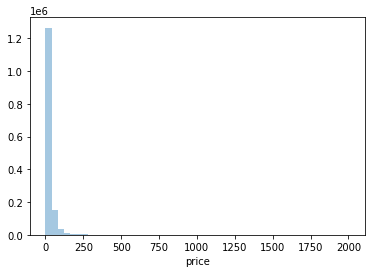

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

y_train_df=mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)
plt.show()

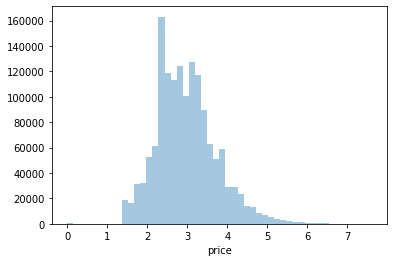

In [ ]:
import numpy as np
y_train_df=np.log1p(y_train_df)
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)
plt.show()

In [ ]:
mercari_df['price']=np.log1p(mercari_df['price'])

### 1. 데이터 전처리
- 다른 피처 shipping과 item_condition_id 값의 유형은 다음과 같다.
 - shipping 칼럼은 배송비 유무로, 값이 비교적 균일하다.
 - item_condition_id 칼럼은 판매자가 제공하는 제품 상태로, 1, 2, 3이 주를 이룬다.
---
- item_description 칼럼은 Null 값은 별로 없지만, 별도의 설명이 없는 경우 'No description yet' 값으로 되어 있다. 
- 이러한 자료의 개수는 82489개로, Null과 마찬가지로 의미 있는 속성값으로 사용될 수 없으므로 적절한 값으로 변경해야 한다.


In [ ]:
print("Shipping 값 유형: \n", mercari_df['shipping'].value_counts())
print("item_condition_id 값 유형: \n", mercari_df['item_condition_id'].value_counts())

Shipping 값 유형: 
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형: 
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [ ]:
boolean_cond=(mercari_df['item_description']=='No description yet')
mercari_df[boolean_cond]['item_description'].count()

82489

### 1. 데이터 전처리
- category_name 칼럼은 '/'로 분리된 카테고리를 하나의 문자열로 나타내고 있다. 예를 들어 Men/Tops/T-shirts는 대분류 'Men', 중분류 'Tops', 소분류 'T-shirts'로 나눌 수 있다.
- category_name의 **'/'를 기준으로 단어를 토큰화하여 각각 별도의 피처로 저장**하고 이를 이용하여 알고리즘을 학습한다.
- '/'를 기준으로 대, 중, 소분류를 효과적으로 분리하기 위해 split_cat() 함수를 생성하고, 이를 DataFrame의 `apply lambda` 식에 적용한다. 
- category_name 칼럼은 약 6300개의 Null 값을 가지고 있으므로 이에 유의하며 분리한다. 
- split_cat() 함수는 먼저 category_name이 Null이 아닌 경우 **`split('/')`**을 이용하여 대, 중, 소분류를 분리한다. 파이썬은 문자열에 **`split(tokenizer문자)`** 함수를 호출하면 tokenizer 문자에 따라 문자열을 분리하여 리스트로 반환한다.
- 만약 category_name이 Null일 경우에는 Error가 발생하므로 except 경우로 처리하여 대, 중, 소분류에 모두 'Other Null' 값을 부여한다.
- 대, 중, 소 칼럼은 mercari_df에서 cat_dae, cat_jung, cat_so로 부여한다.
- DataFrame의 `apply lambda`로 반환되는 데이터 세트가 리스트를 요소로 가지고 있으므로, **`zip`**과 **`*`**를 `apply lambda` 식에 적용하면 여러 개의 칼럼으로 간단하게 분리할 수 있다.
- 대분류의 경우 Women, Beauty, Kids 등의 분류가 매우 많다. 중분류의 경우 유형이 114개, 소분류의 경우 유형이 871개이다.

In [ ]:
#apply lambda에서 호출되는 대, 중, 소분류를 분할하여 리스트로 반환하는 함수 생성
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other Null', 'Other Null', 'Other Null']

In [ ]:
#split_cat() 함수를 apply lambda에서 호출하여 대, 중, 소 칼럼을 생성
mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so']=zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

print("대분류 유형: \n", mercari_df['cat_dae'].value_counts())
print("중분류 개수: ", mercari_df['cat_jung'].nunique())
print("소분류 개수: ", mercari_df['cat_so'].nunique())

대분류 유형: 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other Null                  6327
Name: cat_dae, dtype: int64
중분류 개수:  114
소분류 개수:  871


### 1. 데이터 전처리
- brand_name, category_name, item_description 칼럼의 Null 값은 일괄적으로 'Other_Null'로 동일하게 변경한다.
- `fillna()`를 적용한 뒤에 각 칼럼별로 Null 값이 없는지 `isnull().sum()`을 호출하여 확인하면, 모든 칼럼에서 Null 건수가 0임을 알 수 있다.

In [ ]:
mercari_df['brand_name']=mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna(value='Other_Null')

In [ ]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 2. 피처 인코딩과 피처 벡터화
- Mercari Price Suggestion에 이용되는 데이터 세트는 문자열 칼럼이 많다. 이 문자열 칼럼 중에서 **레이블 또는 원-핫 인코딩을 수행하거나 피처 벡터화로 변환**할 칼럼을 선별한다.
- 먼저 각 피처별로 어떤 방식으로 변환할지 검토한 후에, 추후에 일괄적으로 전체 속성의 변환 작업을 적용한다.
- 예측 모델은 price 값, 즉 상품 가격을 예측해야 하므로 회귀 모델을 기반으로 한다. **선형 회귀 모델과 회귀 트리 모델**을 모두 적용할 것이며, 특히 **선형 회귀의 경우 원-핫 인코딩 적용이 훨씬 선호**되므로 인코딩할 피처는 **모두 원-핫 인코딩을 적용**한다,
- **피처 벡터화**의 경우 비교적 **짧은 텍스트의 경우**에는 **Count 기반 벡터화**를, **긴 텍스트의 경우**에는 **TF-IDF 기반 벡터화**를 적용한다.

1.  brand_name
  - brand_name 칼럼은 상품의 브랜드명이다. 상품 브랜드명의 유형 건수와 대표적인 브랜드명을 살펴보면 대부분 명료한 문자열로 되어 있다. 
  - 따라서 **별도의 피처 벡터화 형태로 만들 필요 없이 인코딩 변환**을 적용한다.
  - brand_name의 종류가 4810건으로 원-핫 인코딩 변환하기에 다소 많아보이나 모델 구축상 큰 문제가 없으므로 **원-핫 인코딩 변환**한다.
2. name
 - name 칼럼은 상품명을 의미하며, 1225273개로 종류가 매우 많다. 전체 데이터가 1482535개이므로 거의 개별적으로 고유한 상품명을 가지고 있다. 
 - name 속성은 유형이 매우 많고, 적은 단어 위주의 텍스트 형태로 되어 있으므로 **Count 기반의 피처 벡터화**를 적용한다.
3. category_name
 - category_name 칼럼은 이전의 전처리를 통해 **대, 중, 소분류 3개 칼럼**인 cat_dae, cat_jung, cat_so로 분리되었다. 
 - 이 3개의 칼럼에 **원-핫 인코딩을 적용**한다.
4. shipping & item_condition_id
 - shipping 칼럼은 배송비 무료 여부로서 0과 1, 2개의 값을 가지고 있다.
 - item_condition_id 칼럼은 상품 상태로서 1, 2, 3, 4, 5의 5개 값을 가지고 있다.
 - 이 두 칼럼에 대하여 모두 **원-핫 인코딩을 적용**한다.
5. item_description
 - item_description 칼럼은 상품에 대한 간단 설명으로, 가장 긴 텍스트를 가지고 있다.
 - 해당 칼럼의 평균 문자열 크기는 145.7로, 비교적 크기 때문에 **TF-IDF 기반의 피처 벡터화**를 적용한다.

In [ ]:
#brand_name
print("brand name의 유형 건수: ", mercari_df['brand_name'].nunique())
print("brand name sample 5건: \n", mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수:  4810
brand name sample 5건: 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [ ]:
#name
print("name의 종류 개수: ", mercari_df['name'].nunique())
print("name sample 10건: \n", mercari_df['name'][:10])

name의 종류 개수:  1225273
name sample 10건: 
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [ ]:
#item_description
print("item_description 평균 문자열 크기: ", mercari_df['item_description'].str.len().mean())

item_description 평균 문자열 크기:  145.7113889385411


### 2. 피처 인코딩과 피처 벡터화
- 이제 주요 칼럼을 인코딩 및 피처 벡터화 변환한다,
- 먼저 name과 item_description 칼럼을 피처 벡터화한다. name 칼럼을 기본 파라미터의 **`CountVectorizer`**로, item_description 칼럼을 `max_features=50000, ngram_range=(1, 3), stop_words='english'` 파라미터의 **`TfidfVectorizer`**로 피처 벡터화한다.
- **`CountVectorizer, TfidfVectorizer`**가 `fit_transform()`을 통해 반환하는 데이터는 **희소 행렬 형태**이다. 희소 행렬 객체 변수인 X_name, X_descp를 새로 결합하여 새로운 데이터 세트로 구성해야 한다.
- 마찬가지로 앞으로 **인코딩** 될 cat_dae, cat_jung, cat_so, brand_name, shipping, item_condition_id도 모두 X_name, X_descp와 결합되어 ML 모델을 실행하는 기반 데이터 세트로 재구성되어야 한다. 이를 위해서 **인코딩 대상 칼럼도** 밀집 행렬 형태가 아닌 **희소 행렬 형태로 인코딩을 적용한 뒤 함께 결합**한다.
- 사이킷런은 원-핫 인코딩을 위해 **`OneHotEncoder`**와 **`LabelBinarizer`** 클래스를 제공하며, 이 중 **`LabelBinarizer`** 클래스는 **희소 행렬 형태의 원-핫 인코딩 변환을 지원**한다. 생성시 파라미터를 **`sparse_output=True`**로 설정하면 된다.
- **모든 인코딩 대상 칼럼**을 **`LabelBinarizer` 을 이용하여 희소 행렬 형태의 원-핫 인코딩으로 변환**한다.
- 인코딩 변환된 데이터 세트가 **CSR 형태로 변환된 csr_matrix 타입**이다.
- 인코딩 후 칼럼이 매우 많이 생겼지만, 피처 벡터화로 텍스트 형태의 문자열이 가지는 벡터 형태의 매우 많은 칼럼과 함께 결합되므로 크게 문제가 되지 않는다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#name 칼럼의 피처 벡터화 변환
cnt_vec=CountVectorizer()
X_name=cnt_vec.fit_transform(mercari_df['name'])

#item_description 칼럼의 피처 벡터화 변환
tfidf_descp=TfidfVectorizer(max_features=50000, ngram_range=(1, 3), stop_words='english')
X_descp=tfidf_descp.fit_transform(mercari_df['item_description'])

print("name vectorization shape: ", X_name.shape)
print("item_description vectorization shape: ", X_descp.shape)

name vectorization shape:  (1482535, 105757)
item_description vectorization shape:  (1482535, 50000)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

#brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name=LabelBinarizer(sparse_output=True)
X_brand=lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id=LabelBinarizer(sparse_output=True)
X_item_cond_id=lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping=LabelBinarizer(sparse_output=True)
X_shipping=lb_shipping.fit_transform(mercari_df['shipping'])

#cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae=LabelBinarizer(sparse_output=True)
X_cat_dae=lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung=LabelBinarizer(sparse_output=True)
X_cat_jung=lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so=LabelBinarizer(sparse_output=True)
X_cat_so=lb_cat_so.fit_transform(mercari_df['cat_so'])

In [ ]:
#제대로 변환되었는지 생성된 인코딩 데이터 세트의 타입과 shape를 확인
print(type(X_brand), type(X_item_cond_id), type(X_shipping)) 
print("X_brand shape: {0}, X_item_cond_id shape: {1}, X_shipping shape : {2}".format(X_brand.shape, X_item_cond_id.shape, X_shipping.shape))
print("X_cat_dae shape: {0}, X_cat_jung shape: {1}, X_cat_so shape: {2}".format(X_cat_dae.shape, X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape: (1482535, 4810), X_item_cond_id shape: (1482535, 5), X_shipping shape : (1482535, 1)
X_cat_dae shape: (1482535, 11), X_cat_jung shape: (1482535, 114), X_cat_so shape: (1482535, 871)


### 2. 피처 인코딩과 피처 벡터화
- 개별 칼럼으로 만들어진 희소 행렬은 사이파이 패키지 **`sparse`** 모듈의 **`hstack()`** 함수를 이용하여 결합한다. 이 함수를 이용하면 **희소 행렬을 손쉽게 칼럼 레벨로 결합**할 수 있다.
- 앞에서 피처 벡터화 변환환 데이터 세트와 희소 인코딩 변환된 데이터 세트를 **`hstack()`**을 이용하여 모두 결합한다.
- 결합된 데이터는 Mercari Price Suggestion을 위한 기반 데이터 세트로 사용되는데 결합한 데이터의 타입과 크기만 확인하고 `del '객체 변수명'`과 `gc.collect()`로 메모리에서 삭제한다.
- 만들어진 결합 데이터가 많은 메모리를 잡아먹어 메모리 오류가 발생할 수 있으므로, 추후에 다양한 모델을 적용할 때마다 다시 결합하여 해당 데이터 세트를 이용한다.
- **`hstack()`**으로 결합한 데이터 세트는 **csr_matrix** 타입이며, 총 161569개의 피처를 가진다. 

In [ ]:
from scipy.sparse import hstack
import gc
sparse_matrix_list=(X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

#hstack 함수를 이용하여 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse=hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

#데이터 세트가 메모리를 많이 차지하므로 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


66

### 3. 릿지 회귀 모델 구축 및 평가
- 여러 알고리즘 모델과 희소 행렬을 변환하고 예측 성능을 비교하며 테스트를 수행하기 위해 필요한 로직을 함수화한다.
- 먼저 모델을 평가하는 평가 로직을 함수화한다. 적용할 평가 지표는 RMSLE 방식으로, RMSE와 유사하나 오류 값에 로그를 취해 RMSE를 구하는 방식이다. 낮은 가격보다 높은 가격에서 오류가 발생할 경우 오류 값이 더 커지는 것을 억제하기 위해 이 방식을 도입한다. 별도의 RMSLE를 구하는 함수를 **`rmsle(y, y_pred)`**로 생성한다. 
- 이때 주의해야할 점은 **원본 데이터의 price 칼럼이 로그 변환**을 취한 값이라는 것이다. 학습할 모델이 사용할 price 값은 로그 값으로 변환된 값이므로 예측도 당연히 로그 변환한 데이터 값 수준의 price 값으로 예측할 것이다. 따라서 **학습 모델을 이용한 예측된 price 값은 다시 지수 변환을 수행**하여 원복해야 한다. 이렇게 원복된 데이터를 기반으로 RMSLE를 적용하도록 **`evaluate_org_price(y_test, preds)`** 함수를 생성한다.
---
- 학습용 데이터를 생성하고, 모델을 학습/예측하는 함수를 생성한다. 
- **`model_train_predict()`** 함수는 **model 인자로 사이킷런의 회귀 estimator 객체**를, **matrix_list 인자로 최종 데이터 세트로 결합할 희소 행렬 리스트**를 가진다. 평가 데이터 세트는 `train_test_split()`을 이용하여 전체 데이터의 20%로 설정한다.

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
    #원본 데이터는 log1p로 변환되었으므로 expm1로 원복 필요
    preds_expm=np.expm1(preds)
    y_test_expm=np.expm1(y_test)

    #rmsle로 RMSLE 값 추출
    rmsle_result=rmsle(y_test_expm, preds_expm)
    return rmsle_result

from sklearn.model_selection import train_test_split
import gc
from scipy.sparse import hstack
def model_train_predict(model, matrix_list):
    #scipy.sparse 모듈의 hstack을 이용하여 희소 행렬 결합
    X=hstack(matrix_list).tocsr()
    X_train, X_test, y_train, y_test=train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)
    
    #모델 학습 및 예측
    model.fit(X_train, y_train)
    preds=model.predict(X_test)

    del X, X_train, X_test, y_train
    gc.collect()

    return preds, y_test

### 3. 릿지 회귀 모델 구축 및 평가
- 먼저 **Ridge**를 이용하여 Mercari Price 회귀 예측을 수행한다.
- 수행 전에 상품 가격 예측에 item_description과 같은 텍스트 형태의 속성이 얼마나 영향을 미치는지 알아본다. item_description 속성의 피처 벡터화 데이터가 포함되지 않았을 때와 포함되었을 때 예측 성능을 다음과 같이 비교할 수 있다.
- item_description을 제외했을 때 RMSLE는 0.502이고, item_description을 포함했을 때 RMSLE는 0.471이다. 
-item_description을 포함했을 때 RMSLE 값이 많이 감소한 것으로 보아, Item description의 영향이 중요함을 알 수 있다.

In [ ]:
from sklearn.linear_model import Ridge
linear_model=Ridge(solver='lsqr', fit_intercept=False)
#item_description을 제외
sparse_matrix_list=(X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test=model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print("item_description을 제외했을 때 rmsle 값: ", evaluate_org_price(y_test, linear_preds))

#item_description을 포함
sparse_matrix_list=(X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test=model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print("item_description을 포함했을 때 rmsle 값: ", evaluate_org_price(y_test, linear_preds))

item_description을 제외했을 때 rmsle 값:  0.5023727038010556
item_description을 포함했을 때 rmsle 값:  0.47121951434336345


### 4. LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가
- LightGBM을 이용하여 회귀를 수행한 뒤, 위에서 구한 **릿지 모델 예측값과 LightGBM 모델 예측값**을 간단한 **앙상블 방식으로 섞어서 최종 회귀 예측값을 평가**한다.
- 앞의 Ridge 예제보다 예측 성능이 더 나아졌다.
- 이렇게 구한 LightGBM 예측 결과값에 위에서 구한 Ridge 예측 결과값을 서로 앙상블하여 최종 예측 결과값을 도출한다.
- **LightGBM 결과값에 0.45**를 곱하고, **Ridge 결과값에 0.55**를 곱한 값을 서로 합하여 최종 예측 결과값으로 한다.
- 즉 최종 예측 결과 데이터 세트는 lgbm_preds * 0.45 + linear_preds * 0.55이다. 이 데이터 세트를 이용하여 예측 성능 결과를 다시 측정한다.
- 간단한 앙상블 방식으로 예측 성능을 더 개선했다.

In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list=(X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
lgbm_model=LGBMRegressor(n_estimators=150, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test=model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print("LightGBM rmsle 값: " , evaluate_org_price(y_test, lgbm_preds))

LightGBM rmsle 값:  0.4599463413865681


In [ ]:
#앙상블
preds=lgbm_preds*0.45+linear_preds*0.55
print("LightGBM과 Ridge를 ensemble한 최종 rmsle 값: ", evaluate_org_price(y_test, preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값:  0.452266845144691
